In [39]:
import iris 
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import numpy as np
import cartopy as cart
import pandas as pd

%matplotlib inline

## Load data

In [50]:
o3 = iris.load('data/hourly_daily_ozone_global_climatology.nc')
csv = pd.read_csv('/gws/nopw/j04/ncas_generic/ESGF_data/sugarcane/daily_max_observations.csv')
csv_month = pd.read_csv('/gws/nopw/j04/ncas_generic/ESGF_data/sugarcane/monthly_mean_max_observations.csv')

In [51]:
plt.rcParams['font.size'] = '20'

## Daily cycle

In [42]:
months = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

In [43]:
max_day = o3[0][17::24]

In [44]:
marker_1 = max_day.extract(iris.Constraint(latitude = -20.625) & iris.Constraint(longitude = 312.1875))

In [45]:
marker_2 = max_day.extract(iris.Constraint(latitude = -23.125) & iris.Constraint(longitude = 312.1875))
marker_0 = max_day.extract(iris.Constraint(latitude = -23.125) & iris.Constraint(longitude = 314.0625))
marker_4 = max_day.extract(iris.Constraint(latitude = -21.875) & iris.Constraint(longitude = 317.8125))
marker_5 = max_day.extract(iris.Constraint(latitude = -20.625) & iris.Constraint(longitude = 317.8125))
marker_6 = max_day.extract(iris.Constraint(latitude = -20.625) & iris.Constraint(longitude = 315.9375))
marker_7 = max_day.extract(iris.Constraint(latitude = -21.875) & iris.Constraint(longitude = 315.9375))
marker_8 = max_day.extract(iris.Constraint(latitude = -21.875) & iris.Constraint(longitude = 314.0625))

In [46]:
marker_3 = max_day.extract(iris.Constraint(latitude = -24.375) & iris.Constraint(longitude = 314.0625))

In [47]:
marker_list = [marker_0.data, marker_1.data, marker_2.data, marker_4.data, marker_5.data, marker_6.data, marker_7.data, marker_8.data]

In [48]:
marker_mean = np.mean(marker_list, axis = 0)

Text(0.5, 1.0, 'Distributions of daily max O$_3$')

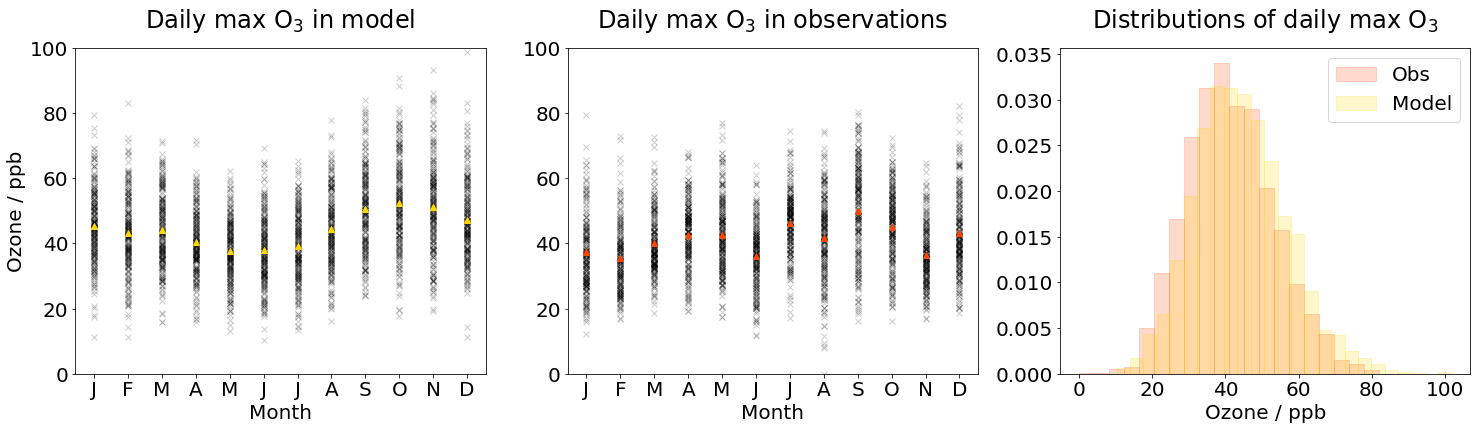

In [52]:
plt.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(25,6))

fig.patch.set_facecolor('white')

plt.subplot(131)

for i in range(0,12):
    for marker in marker_list:
        plt.plot(np.tile(i, [30]), marker[i*30:(i*30)+30], 'kx', alpha = 0.2)
    
    plt.plot(i, np.mean(marker_mean[i*30:(i*30)+30]), '^', color = 'gold')

plt.ylim(0,100)
plt.xticks(range(0,12), months)
plt.xlabel('Month')
plt.ylabel('Ozone / ppb')


plt.title('Daily max O$_3$ in model', pad = 20)

plt.subplot(132)
plt.plot(csv['Month'], csv['Ozone_ppb'], 'kx', alpha = 0.2)
    
plt.plot(csv_month['Month'], csv_month['Ozone_ppb'], '^', color = 'orangered')
plt.ylim(0,100)
plt.xticks(range(1,13), months)
plt.xlabel('Month')


plt.title('Daily max O$_3$ in observations', pad = 20)

plt.subplot(133)
a=plt.hist(csv['Ozone_ppb'],density=True, bins=20, alpha=0.2, color = 'orangered', edgecolor='orangered', label = 'Obs')
a=plt.hist(np.array(marker_list).ravel(),density=True, bins=25, alpha=0.2, color = 'gold', edgecolor='gold', label='Model')
plt.xlabel('Ozone / ppb')
plt.legend()
plt.title('Distributions of daily max O$_3$', pad = 20)